In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3590, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience lagoon,sector 24,4.25,13281.0,3,4,3+,3.0,Old Property,3201.0,0,1,0,1,0,1,143
1,flat,capital residences 360,sector 70,1.18,8138.0,2,2,3,7.0,New Property,1400.0,0,0,0,1,0,0,140
2,flat,umang winter hills,sector 77,0.71,5306.0,2,2,2,6.0,Relatively New,1057.0,1,0,0,0,0,0,108
3,flat,rof ananda,sector 95,0.20,5464.0,1,1,1,10.0,Relatively New,407.0,0,0,0,0,0,0,82
4,flat,shree vardhman flora,sector 90,0.90,4615.0,3,4,3,4.0,Relatively New,1765.0,0,1,0,0,0,0,165


In [5]:
latlong = pd.read_csv('gurgaon_sectors_coordinates.csv')

In [6]:
latlong.head()

,Sector,Coordinates
0,sector 24,"28.4174779, 77.0587498"
1,sector 70,"28.5175247, 77.0425692"
2,sector 77,"28.4421059, 77.1112654"
3,sector 95,"28.4421059, 77.1112654"
4,sector 90,"28.4421059, 77.1112654"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3590 non-null   object 
 1   society          3590 non-null   object 
 2   sector           3590 non-null   object 
 3   price            3590 non-null   float64
 4   price_per_sqft   3590 non-null   float64
 5   bedRoom          3590 non-null   int64  
 6   bathroom         3590 non-null   int64  
 7   balcony          3590 non-null   object 
 8   floorNum         3590 non-null   float64
 9   agePossession    3590 non-null   object 
 10  built_up_area    3590 non-null   float64
 11  study room       3590 non-null   int64  
 12  servant room     3590 non-null   int64  
 13  store room       3590 non-null   int64  
 14  pooja room       3590 non-null   int64  
 15  others           3590 non-null   int64  
 16  furnishing_type  3590 non-null   int64  
 17  luxury_score  

In [8]:
latlong.head()

,Sector,Coordinates
0,sector 24,"28.4174779, 77.0587498"
1,sector 70,"28.5175247, 77.0425692"
2,sector 77,"28.4421059, 77.1112654"
3,sector 95,"28.4421059, 77.1112654"
4,sector 90,"28.4421059, 77.1112654"


In [9]:
latlong.shape

(98, 2)

In [10]:
latlong.isnull().sum()

,0
Sector,0
Coordinates,2


In [11]:
latlong[latlong['Coordinates'].isnull()]

,Sector,Coordinates
52,gwal pahari,NaN
72,dwarka,NaN


In [12]:
latlong.loc[52, 'Coordinates'] = '28.457523,77.026344'

In [13]:
latlong[latlong['Coordinates'].isnull()]

,Sector,Coordinates
72,dwarka,NaN


In [14]:
latlong.loc[72, 'Coordinates'] = '28.593,77.016'

In [15]:
latlong[latlong['Coordinates'].isnull()]

,Sector,Coordinates


In [16]:
latlong['latitude'] = latlong['Coordinates'].str.split(',').str.get(0).astype('float')

In [17]:
latlong['longitude'] = latlong['Coordinates'].str.split(',').str.get(1).astype('float')

In [19]:
new_df = df.merge(latlong, left_on='sector', right_on='Sector', how='inner')

In [20]:
new_df.shape

(3590, 22)

In [21]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,servant room,store room,pooja room,others,furnishing_type,luxury_score,Sector,Coordinates,latitude,longitude
0,flat,ambience lagoon,sector 24,4.25,13281.0,3,4,3+,3.0,Old Property,...,1,0,1,0,1,143,sector 24,"28.4174779, 77.0587498",28.417478,77.058750
1,flat,capital residences 360,sector 70,1.18,8138.0,2,2,3,7.0,New Property,...,0,0,1,0,0,140,sector 70,"28.5175247, 77.0425692",28.517525,77.042569
2,flat,umang winter hills,sector 77,0.71,5306.0,2,2,2,6.0,Relatively New,...,0,0,0,0,0,108,sector 77,"28.4421059, 77.1112654",28.442106,77.111265
3,flat,rof ananda,sector 95,0.20,5464.0,1,1,1,10.0,Relatively New,...,0,0,0,0,0,82,sector 95,"28.4421059, 77.1112654",28.442106,77.111265
4,flat,shree vardhman flora,sector 90,0.90,4615.0,3,4,3,4.0,Relatively New,...,1,0,0,0,0,165,sector 90,"28.4421059, 77.1112654",28.442106,77.111265


In [22]:
group_df = new_df.groupby('sector')[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']].mean().reset_index()

In [23]:
group_df

,sector,price,price_per_sqft,built_up_area,latitude,longitude
0,dwarka,1.372500,8988.250000,1606.000000,28.593000,77.016000
1,gwal pahari,3.192222,9585.777778,3056.166667,28.457523,77.026344
2,manesar,1.244687,4888.281250,2194.126555,28.393283,76.954528
3,sector 1,1.860000,8249.833333,2327.833333,28.517525,77.042569
4,sector 10,2.092857,11866.428571,1908.855045,28.481369,77.074034
...,...,...,...,...,...,...
93,sector 92,0.934000,5928.280000,1571.341800,28.442106,77.111265
94,sector 93,0.848889,8009.777778,1017.000000,28.415605,76.931638
95,sector 95,0.480545,5602.509091,995.981818,28.442106,77.111265
96,sector 99,1.008095,6412.166667,1364.214286,28.442106,77.111265


In [24]:
import plotly.express as px

fig = px.scatter_mapbox(
    group_df,
    lat='latitude',
    lon='longitude',
    hover_name='sector',
    color='price_per_sqft',
    size='built_up_area',
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=10,
    mapbox_style='open-street-map',
    text='sector'
)

fig.show()


In [25]:
print(new_df[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']].dtypes)


price             float64
price_per_sqft    float64
built_up_area     float64
latitude          float64
longitude         float64
dtype: object


In [26]:
new_df.to_csv('data_viz1.csv', index=False)

In [27]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [28]:
wordcloud_df = df1.merge(df, left_index = True, right_index = True)[['features', 'sector']] # to add info about sector

In [45]:
wordcloud_df.to_csv('wordcloud.csv', index=False)

In [29]:
wordcloud_df.head()

,features,sector
0,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 24
1,NaN,sector 70
2,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 77
3,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 95
4,"['Security / Fire Alarm', 'Power Back-up', 'In...",sector 90


In [42]:
def plot_word_cloud_for_sector(sector_name) :
  main = []
  temp_df = wordcloud_df[wordcloud_df['sector'] == sector_name]
  for item in  temp_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)
  feature_text = ' '.join(temp_df['features'].dropna())
  plt.rcParams['font.family'] = 'Arial'
  wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=set(['s']),
                      min_font_size=10
                      ).generate(feature_text)
  plt.figure(figsize = (8,8), facecolor = None)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()

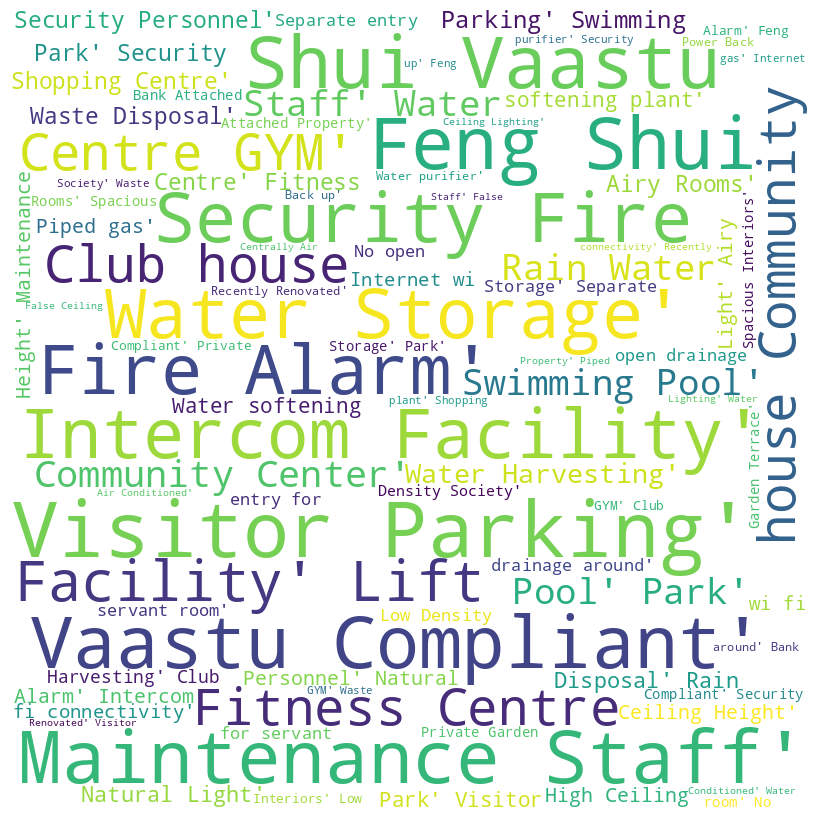

In [44]:
plot_word_cloud_for_sector('sector 49')

In [32]:
import ast
main = []
for item in  wordcloud_df['features'].dropna().apply(ast.literal_eval):
  main.extend(item)

In [33]:
!pip install wordcloud

In [36]:
from wordcloud import WordCloud

In [37]:
feature_text = ' '.join(main)

In [38]:
feature_text

'Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) High Ceiling Height Maintenance Staff Water Storage Separate entry for servant room No open drainage around Piped-gas Internet/wi-fi connectivity Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Shopping Centre Fitness Centre / GYM Club house / Community Center Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room Piped-gas Visitor Parking Swimming Pool Park Security Personnel Natural Light Internet/wi-fi connectivity Airy Rooms Low Density Society Shopping Centre Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Water softening plant Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Hig

In [39]:
plt.rcParams['font.family'] = 'Arial'
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=set(['s']),
                      min_font_size=10
                      ).generate(feature_text)

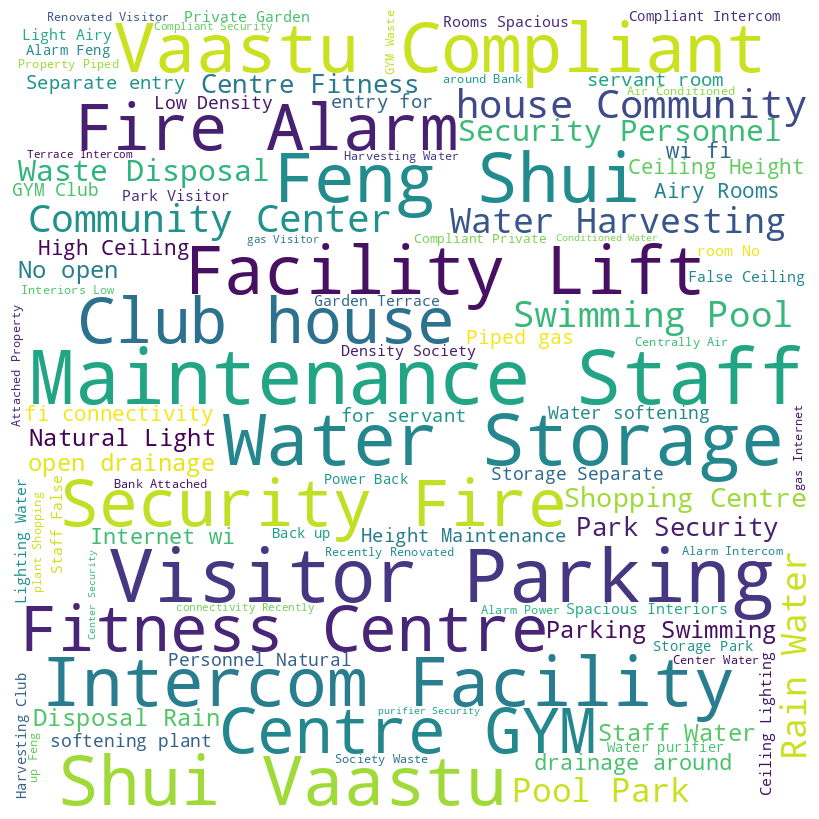

In [40]:
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [41]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl', 'wb'))

In [48]:
fig = px.scatter(df, x = 'built_up_area', y = 'price', color = 'bedRoom', title = 'Area vs Price').update_layout(
    xaxis_title="Area", yaxis_title="Price"
)
fig.show()

In [49]:
figx = px.pie(df, names = 'bedRoom', title = 'Total Bill Amount by Day')
figx.show()

In [51]:
temp_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [53]:
temp_df = df[df['bedRoom']<=4]
fig = px.box(temp_df, x = 'bedRoom', y = 'price', title = 'BHK price range').update_layout(
    xaxis_title="BHK", yaxis_title="Price in Cr"
)
fig.show()


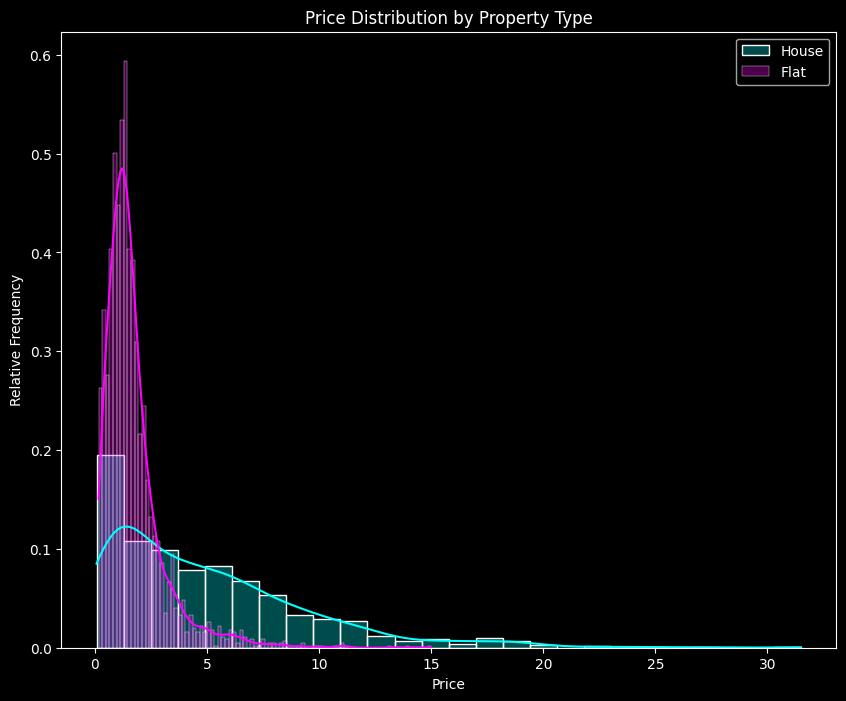

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")  # Black background

fig = plt.figure(figsize=(10, 8))

# House
sns.histplot(new_df[new_df['property_type'] == 'house']['price'], kde=True,
             color="#00FFFF", label="House", stat="density", alpha=0.3)

# Flat
sns.histplot(new_df[new_df['property_type'] == 'flat']['price'], kde=True,
             color="#FF00FF", label="Flat", stat="density", alpha=0.3)

plt.xlabel("Price")
plt.ylabel("Relative Frequency")  # or "Likelihood of Price"
plt.title("Price Distribution by Property Type")
plt.legend()

plt.show()